11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Counts of each digit in the training dataset:
Digit 0: 5923
Digit 1: 6742
Digit 2: 5958
Digit 3: 6131
Digit 4: 5842
Digit 5: 5421
Digit 6: 5918
Digit 7: 6265
Digit 8: 5851
Digit 9: 5949


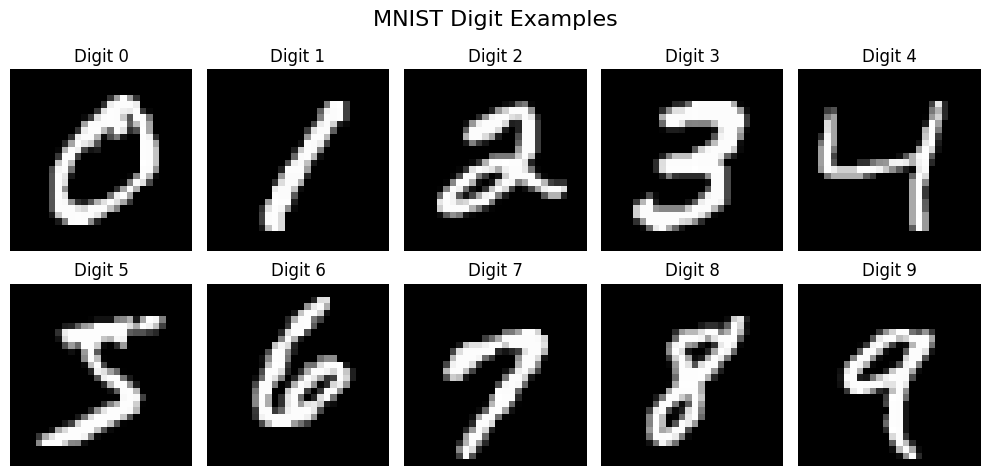


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Random Forest Accuracy: 0.97


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9285 - loss: 0.2514 - val_accuracy: 0.9529 - val_loss: 0.1679
Epoch 2/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9674 - loss: 0.1072 - val_accuracy: 0.9598 - val_loss: 0.1446
Epoch 3/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9778 - loss: 0.0696 - val_accuracy: 0.9647 - val_loss: 0.1445
Epoch 4/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9816 - loss: 0.0591 - val_accuracy: 0.9682 - val_loss: 0.1352
Epoch 5/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9860 - loss: 0.0444 - val_accuracy: 0.9695 - val_loss: 0.1307
Epoch 6/10
1500/1500 - 7s - 5ms/step - accuracy: 0.9901 - loss: 0.0322 - val_accuracy: 0.9650 - val_loss: 0.1581
Epoch 7/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9891 - loss: 0.0380 - val_accuracy: 0.9720 - val_loss: 0.1448
Epoch 8/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9912 - loss: 0.0322 - val_accuracy: 0.9697 - val_loss: 0.1621
Epoch 9/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9668 -

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print("Counts of each digit in the training dataset:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count}")

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("MNIST Digit Examples", fontsize=16)
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(x_train[y_train == i][0], cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()
x_train_flat_scaled = scaler.fit_transform(x_train_flat)
x_test_flat_scaled = scaler.transform(x_test_flat)

x_train_rf, x_val_rf, y_train_rf, y_val_rf = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(x_test_flat)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

x_train_mlp, x_val_mlp, y_train_mlp, y_val_mlp = train_test_split(x_train_flat_scaled, y_train, test_size=0.2, random_state=42)
y_train_mlp_cat = to_categorical(y_train_mlp, 10)
y_val_mlp_cat = to_categorical(y_val_mlp, 10)
y_test_mlp_cat = to_categorical(y_test, 10)

mlp_model = Sequential([
    Flatten(input_shape=(x_train_flat_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mlp_model.fit(x_train_mlp, y_train_mlp_cat, validation_data=(x_val_mlp, y_val_mlp_cat), epochs=10, batch_size=32, verbose=2)

y_pred_mlp = np.argmax(mlp_model.predict(x_test_flat_scaled), axis=1)
print("\nMLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}")
